# **Ocorrências aeronáuticas do Mundo, de 2008 a setembro de 2020.**

Este estudo tem como objetivo analisar as ocorrências aeronáuticas mundiais, entre 2008 e 2020, obtidas pela International Civil Aviation Organization (ICAO).

In [ ]:
pip install sidetable

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
import sidetable

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from seaborn import countplot
from matplotlib.pyplot import figure, show

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **Importação das bibliotecas e Leitura dos dados**

In [ ]:
icao = pd.read_csv("../content/data - Safety related Occurrences.csv",
                        na_values=['', 'NULL'],
                        header=0, sep = ',',
                        engine = 'python'
                       )

In [ ]:
icao.head(4)

In [ ]:
icao.shape

(26136, 24)

In [ ]:
icao.columns

In [ ]:
icao.nunique()

Date                    4554
StateOfOccurrence        209
Location                7565
Model                   2093
Registration           22196
Operator                8429
StateOfOperator          155
StateOfRegistry          180
FlightPhase               11
Class                     12
Fatalities                78
Over2250                   2
Over5700                   2
ScheduledCommercial        2
InjuryLevel                5
TypeDesignator           761
Helicopter                 2
Airplane                   2
Engines                    6
EngineType                 4
Official                   2
OccCats                  612
Risk                      27
Year                      13
dtype: int64

In [ ]:
icao = icao.drop(columns = ['Location','Registration', 'Operator', 'StateOfOperator',
                            'StateOfRegistry', 'ScheduledCommercial',
                            'Official', 'OccCats', 'Risk' ])

In [ ]:
icao.columns

Index(['Date', 'StateOfOccurrence', 'Model', 'FlightPhase', 'Class',
       'Fatalities', 'Over2250', 'Over5700', 'InjuryLevel', 'TypeDesignator',
       'Helicopter', 'Airplane', 'Engines', 'EngineType', 'Year'],
      dtype='object')

In [ ]:
icao.shape

(26136, 15)

In [ ]:
icao.describe()

,Fatalities,Engines,Year
count,16473.000000,26136.000000,26136.000000
mean,0.800461,1.814777,2014.230257
std,7.128943,0.651067,3.670326
min,0.000000,1.000000,2008.000000
25%,0.000000,1.000000,2011.000000
50%,0.000000,2.000000,2015.000000
75%,0.000000,2.000000,2017.000000
max,298.000000,8.000000,2020.000000


## **Estatística descritiva dos acidentes**

A análise dos dados poderá responder as seguintes questões:

1) Quantos acidentes houve no período de 2008 a 2020, por ano?

2) Quantos foram os acidentes por país?

3) Quais os modelos de aeronaves mais frequentes?

4) Quantos acidentes houve, pela fase da operação?

5) Quais foram os níveis de danos, encontrados nas ocorrências?

6) Quantas fatalidades ocorreram, no período?

In [ ]:
# ocor por ano crescente
por_a = (icao['Year'])
por_a.count()

In [ ]:
# Classificação ocorrencias

print(icao['Class'].unique())
print(icao['Class'].value_counts())

['Accident' 'Incident' 'Serious incident' 'Significant incident' nan
 'Major incident' 'Occurrence without safety effect' 'Not determined'
 'Report' 'Crash' 'News' 'Occurrence with No Flight Intended'
 'Serious Incident']
Accident                              12458
Incident                              10666
Serious incident                       1945
Serious Incident                        384
Report                                  131
Occurrence without safety effect        117
Significant incident                     66
Major incident                           15
Not determined                           10
News                                      5
Crash                                     3
Occurrence with No Flight Intended        2
Name: Class, dtype: int64


A partir daqui, tratarei apenas de acidentes

In [ ]:
# df de acidentes
ac = icao[icao['Class'] == 'Accident']

In [ ]:
ac

In [ ]:
# Gráfico de acidentes Por ano - palette
px = ac.Year.value_counts()

#palette_platform = sns.light_palette("green",25,reverse=True)
fig = plt.figure(figsize=(18,8))
cx = sns.barplot(px.index, px.values,data=icao) #palette=palette_platform,
#plt.title('Ocorrências por Ano',fontsize=21)
plt.xlabel('Ano')
plt.ylabel('')

for p in cx.patches:
        cx.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+10))

In [ ]:
   # acid por país
   print(icao['StateOfOccurrence'].value_counts())

In [ ]:
# Acidentes por State
ac.stb.freq(['StateOfOccurrence'], thresh=70)

,StateOfOccurrence,count,percent,cumulative_count,cumulative_percent
0,USA,4506,38.525992,4506,38.525992
1,CAN,709,6.061902,5215,44.587893
2,BRA,467,3.992818,5682,48.580711
3,AUS,411,3.514022,6093,52.094733
4,RUS,384,3.283174,6477,55.377907
5,GBR,353,3.018126,6830,58.396033
6,ZAF,287,2.453830,7117,60.849863
7,FRA,238,2.034884,7355,62.884747
8,DEU,194,1.658687,7549,64.543434
9,ITA,186,1.590287,7735,66.133721


In [ ]:
# Gráfico de acidentes Por país - 10+
px = ac.StateOfOccurrence.value_counts().head(10)

palette_platform = sns.cubehelix_palette(15,reverse=True)
fig = plt.figure(figsize=(10,5))
cx = sns.barplot(px.index, px.values,data=icao,palette=palette_platform)
plt.xlabel('State')
plt.ylabel('')

for p in cx.patches:
        cx.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50))

In [ ]:
# classificação
#print(ac['Class'].unique())
print(ac['Class'].value_counts())
#print(ac['Class'].count())

In [ ]:
print('Total: ' +
      str(icao['Class'].count())
     )


print('ACIDENTES: ' +
      str(icao['Class'][icao['Class'] == 'Accident'].count())
     )

Total: 25802
ACIDENTES: 12458


In [ ]:
# tabela freq por modelo
ac.stb.freq(['Model'], thresh=35)

,Model,count,percent,cumulative_count,cumulative_percent
0,Robinson Helicopter Company R44,891,7.255700,891,7.255700
1,Robinson Helicopter Company R22,548,4.462541,1439,11.718241
2,Bell Bell 206,532,4.332248,1971,16.050489
3,Airbus Helicopters H125 / AS350,472,3.843648,2443,19.894137
4,Piper Aircraft Inc PA-34 Seneca,320,2.605863,2763,22.500000
5,Beechcraft Corp Baron (Beech 58),228,1.856678,2991,24.356678
6,Sikorsky (Schweizer) Hughes 269,210,1.710098,3201,26.066775
7,MD Helicopters Inc MD500 / Hughes 369,177,1.441368,3378,27.508143
8,Piper Aircraft Inc PA-31 Navajo,175,1.425081,3553,28.933225
9,Cessna Aircraft Company 208,169,1.376221,3722,30.309446


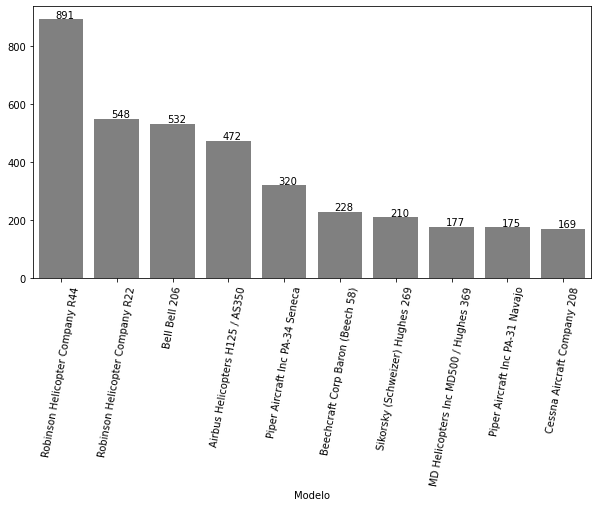

In [ ]:
# gráfico de acidentes por modelo
px = ac['Model'].value_counts().head(10)

fig = plt.figure(figsize=(10,5))
cx = sns.barplot(px.index, px.values,data=icao, color="grey")
plt.xlabel('Modelo')
plt.ylabel('')
plt.xticks(rotation=80)

for p in cx.patches:
        cx.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+.3, p.get_height()+5))

In [ ]:
ac['FlightPhase'].value_counts()

In [ ]:
# tabela aeronave fase operacao com %
ac.stb.freq(['FlightPhase'], thresh=80)

In [ ]:
# Graf fase da operação
plt.figure(figsize=(12,8))
#ax = sns.countplot(data= icao, x=ac['FlightPhase'])
dx = sns.countplot(x=ac['FlightPhase'],order=ac['FlightPhase'].value_counts().index,data=icao, color="red")
#plt.title('Ocorrências por Fase da Operação',fontsize=21)
plt.xlabel('Flight Phase')
plt.ylabel('')
#plt.xticks(rotation=80)

for p in dx.patches:
        dx.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [ ]:
ac['TypeDesignator'].value_counts()

In [ ]:
# Tabla freq Designador de tipo -  Icao
ac.stb.freq(['TypeDesignator'], thresh=35)

,TypeDesignator,count,percent,cumulative_count,cumulative_percent
0,R44,909,7.296516,909,7.296516
1,R22,565,4.535238,1474,11.831755
2,AS50,556,4.462996,2030,16.294750
3,B37M,485,3.893081,2515,20.187831
4,PA34,324,2.600738,2839,22.788570
5,EBOY,320,2.568631,3159,25.357200
6,PA47,304,2.440199,3463,27.797399
7,BE58,296,2.375983,3759,30.173383
8,C208,261,2.095039,4020,32.268422
9,H500,243,1.950554,4263,34.218976


In [ ]:
# gráfico de acidentes por modelo
px = ac['TypeDesignator'].value_counts().head(10)

fig = plt.figure(figsize=(10,5))
cx = sns.barplot(px.index, px.values,data=icao, color="green")
plt.xlabel('TypeDesignator')
plt.ylabel('')
#plt.xticks(rotation=80)

for p in cx.patches:
        cx.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+.3, p.get_height()+5))

In [ ]:
ac['InjuryLevel'].value_counts()

In [ ]:
# Por nivel dano  - absoluto e %
px = ac['InjuryLevel'].value_counts()

fig, (cx,dx) = plt.subplots(1,2, figsize=(12,6))
cx.bar(px.index, px.values, color=("blue","orange","green","red","purple"))
plt.ylabel('')

for p in cx.patches:
        cx.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+.3, p.get_height()+50))

# Graf nivel dano - pizza
dx = ac['InjuryLevel'].value_counts().plot(kind='pie', subplots=True,
                                                     label="" ,
                                                    # figsize=(6, 6),
                                                     autopct='%1.0f%%'
                                                     )

In [ ]:
# resumo de fatalidades, incluindo 0
#ac['Fatalities'].describe()

In [ ]:
# resumo de fatalidades
ac['Fatalities'][ac['Fatalities']>=1].describe()

count    2499.000000
mean        5.266106
std        17.650531
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max       298.000000
Name: Fatalities, dtype: float64

In [ ]:
ac['Fatalities'].max()

298.0

In [ ]:
# dados do acidente com maior numero de fatalidades

maxfat = ac['Fatalities']==ac['Fatalities'].max()

print('Modelo de aeronave do acidente com mais mortes: ' +str(ac['Model'][maxfat]))

print('Data: ' + str(ac['Date'][maxfat]))

print('Fase da Operação: ' + str(ac['FlightPhase'][maxfat]))

print('País: ' + str(ac['StateOfOccurrence'][maxfat]))

print('Designador de tipo: ' + str(ac['TypeDesignator'][maxfat]))

Modelo de aeronave do acidente com mais mortes: 11560    Boeing 777
Name: Model, dtype: object
Data: 11560    "2014-07-17T00:00:00.000Z"
Name: Date, dtype: object
Fase da Operação: 11560    En route
Name: FlightPhase, dtype: object
País: 11560    UKR
Name: StateOfOccurrence, dtype: object
Designador de tipo: 11560    B37M
Name: TypeDesignator, dtype: object


In [ ]:
# Fatalidades
px = ac.Fatalities.value_counts().head(20)

# Plotando em um gráfico os 10 +
#palette_platform = sns.light_palette("green",25,reverse=True)
fig = plt.figure(figsize=(18,5))
cx = sns.barplot(px.index,px.values, color="lightcoral", data=icao) #palette=palette_platform
#plt.title('Fatalidades',fontsize=21)
plt.xlabel('Fatalities')
plt.ylabel('')

for p in cx.patches:
        cx.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+50))

In [ ]:
# Fatalidades por State
ac.stb.freq(['StateOfOccurrence'], value='Fatalities', thresh=50)